ARJUN KC(8773456)

**Assignment 3 CSCN8000 Artificial Intelligence Algorithms and Mathematics**

1.  Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop the other two features for simplicity.
   
    Figure out if any preprocessing such as scaling would help here
    
    Draw elbow plot and from that figure out optimal value of k
    
2.  Use the heart dataset from the Resources Folder or access it from https://www.kaggle.com/fedesoriano/heart-failure-prediction 
   
    Load heart disease dataset in pandas dataframe
   
    Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
    
    Convert text columns to numbers using label encoding / one hot encoding
    
    Apply scaling
    
    Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
    
    Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy. 
  



**Notes: This lab should be submitted as a notebook and an HTML. Follow https://docs.github.com/en/pages/quickstart.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from scipy.stats import zscore

Part 1

Loading the Iris dataset

In [2]:
load_iris = load_iris()

In [3]:
df = load_iris.data[:,2:4] #extracting the data where we are taking all rows and but only taking 2 and 3 columns
                            #here we got the petal and lenght of features

Standardizing the data

In [4]:
scal = StandardScaler()

In [5]:
scal_df = scal.fit_transform(df)

In [6]:
scal_df #we standardize the data

array([[-1.34022653e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.39706395e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.16971425e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.44707648e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.22655167e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.44707648e+00],
       [-1.51073881e+00, -1.44707648e+00],
       [-1.45390138e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.39706395e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.56757623e+00, -1.31544430e+00],
       [-1.

For Elbow plot where we find the optimal value of K

F:\Conestoga_college_course\AI_ML\CSCN8010_23S_SC1_Foundation_of_Machine_Learning\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
F:\Conestoga_college_course\AI_ML\CSCN8010_23S_SC1_Foundation_of_Machine_Learning\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
F:\Conestoga_college_course\AI_ML\CSCN8010_23S_SC1_Foundation_of_Machine_Learning\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
F:\Conestoga_colleg

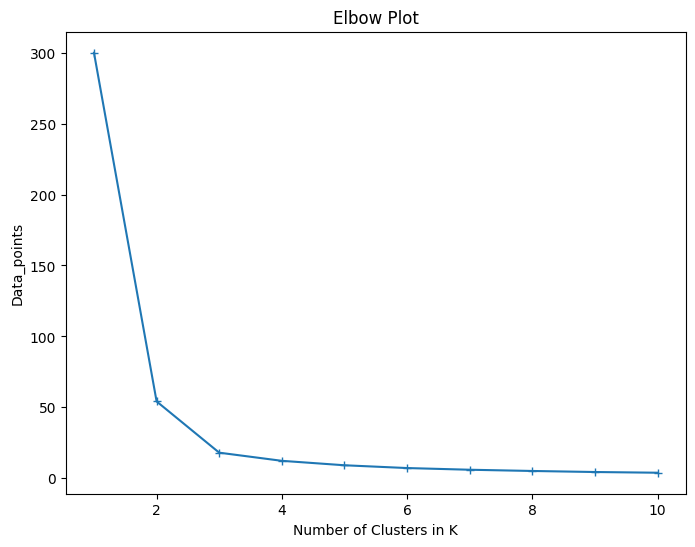

In [7]:
data_point = [] #here we create the empty list which store the data and also reprsent how far the data points are within the cluster from the center of that cluster
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=42)  #create the KMeans instance with current k
    kmeans.fit(scal_df)  #fit the Kmeans algorithm 
    data_point.append(kmeans.inertia_)

    
plt.figure(figsize=(8,6))
plt.plot(range(1,11),data_point,marker="+")
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters in K")
plt.ylabel("Data_points")
plt.show()

From the elbow plot, we chose the k = 3 as the optimal number of clusters

In [8]:
optm_k= 3

Now applying the KMeans Clustering

In [9]:
kmeans = KMeans(n_clusters= optm_k,random_state=42)
cltrs = kmeans.fit_predict(scal_df)

F:\Conestoga_college_course\AI_ML\CSCN8010_23S_SC1_Foundation_of_Machine_Learning\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Now plotting the clusters

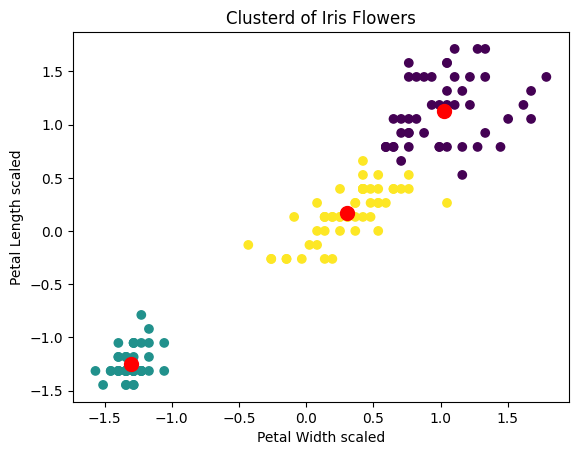

here we can see that three colored data points which is data is divide into three clusters where red colored indicates that clusters center is determinded by KMeans Algorithm


In [10]:
plt.scatter(scal_df[:,0],scal_df[:,1],c=cltrs,cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="o",s=100,color = "red")
plt.title("Clusterd of Iris Flowers")
plt.xlabel("Petal Width scaled")
plt.ylabel("Petal Length scaled")
plt.show()
print("here we can see that three colored data points which is data is divide into three clusters where red colored indicates that clusters center is determinded by KMeans Algorithm")

Part 2

Heart Diseases Classification

In [11]:
ht_df =pd.read_csv("heart.csv")  #loading the dataset

In [12]:
ht_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
ht_df.shape

(918, 12)

In [14]:
ht_df.isnull().sum()  #no missing value

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Now removing the outliers using Zscore for the given dataset

In [15]:
num_col = ht_df.select_dtypes(include=["int64","float64"]).columns  #selecting the numeric columns from the dataframe
ht_df[num_col] = ht_df[num_col].fillna(ht_df[num_col].mean())  #hadnling missing value where replacing the Nan with mean for numeric columns

Now calculating the z-score for numeric columns

In [16]:
z_scr = zscore(ht_df[num_col])

Now filtering out the rows with z-score beyond -3 and 3 for all numeric columns

In [17]:
filter_data = ((z_scr>-3) & (z_scr<3)).all(axis=1)
ht_df = ht_df[filter_data]

In [18]:
ht_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Now converting the object or text columns to number using label encoding

In [19]:
labl_encod = LabelEncoder()
ht_df["Sex"] = labl_encod.fit_transform(ht_df["Sex"])
ht_df["ExerciseAngina"] = labl_encod.fit_transform(ht_df["ExerciseAngina"])


Now using One hot encoding for rest of text data

In [20]:
ht_df = pd.get_dummies(ht_df,columns=["RestingECG","ChestPainType","ST_Slope"])

In [21]:
ht_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,True,False,False,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,False,True,False,True,False,False,False,False,True
3,48,0,138,214,0,108,1,1.5,1,False,True,False,True,False,False,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,False,True,False,False,False,False,True,False,True,False
914,68,1,144,193,1,141,0,3.4,1,False,True,False,True,False,False,False,False,True,False
915,57,1,130,131,0,115,1,1.2,1,False,True,False,True,False,False,False,False,True,False
916,57,0,130,236,0,174,0,0.0,1,True,False,False,False,True,False,False,False,True,False


Standardizing the converted numeric columns

In [22]:
scaler = StandardScaler()
num_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'] 
ht_df[num_col] = scaler.fit_transform(ht_df[num_col])

In [23]:
ht_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.428154,1,0.465900,0.849636,0,1.384320,0,-0.855469,0,False,True,False,False,True,False,False,False,False,True
1,-0.475855,0,1.634714,-0.168122,0,0.752973,0,0.137516,1,False,True,False,False,False,True,False,False,True,False
2,-1.745588,1,-0.118507,0.793612,0,-1.535661,0,-0.855469,0,False,False,True,False,True,False,False,False,False,True
3,-0.581666,0,0.349019,0.149344,0,-1.141069,1,0.634008,1,False,True,False,True,False,False,False,False,True,False
4,0.053200,1,1.050307,-0.028064,0,-0.588640,0,-0.855469,0,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.899099,1,-1.287320,0.616205,0,-0.194048,0,0.336112,1,False,True,False,False,False,False,True,False,True,False
914,1.534554,1,0.699663,-0.046738,1,0.161085,0,2.520678,1,False,True,False,True,False,False,False,False,True,False
915,0.370633,1,-0.118507,-0.625646,0,-0.864854,1,0.336112,1,False,True,False,True,False,False,False,False,True,False
916,0.370633,0,-0.118507,0.354763,0,1.463238,0,-0.855469,1,True,False,False,False,True,False,False,False,True,False


Now splitting the data into independent and dependent variable

In [24]:
X = ht_df.drop(columns=['HeartDisease'])  #independent vaiable or feature columns
y = ht_df['HeartDisease']  #dependent variable or target colums

Now Scaling all the data in features and target

In [25]:
scalr = StandardScaler()
X_scal = scalr.fit_transform(X)

In [26]:
X_scal_df = pd.DataFrame(X_scal,columns=X.columns)

In [27]:
X_scal_df #here we can see all the scaled data

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.428154,0.515943,0.465900,0.849636,-0.550362,1.384320,-0.822945,-0.855469,-0.503821,0.809702,-0.489898,-1.077524,2.063325,-0.534905,-0.229550,-0.260184,-0.998888,1.134695
1,-0.475855,-1.938199,1.634714,-0.168122,-0.550362,0.752973,-0.822945,0.137516,-0.503821,0.809702,-0.489898,-1.077524,-0.484655,1.869492,-0.229550,-0.260184,1.001113,-0.881294
2,-1.745588,0.515943,-0.118507,0.793612,-0.550362,-1.535661,-0.822945,-0.855469,-0.503821,-1.235023,2.041241,-1.077524,2.063325,-0.534905,-0.229550,-0.260184,-0.998888,1.134695
3,-0.581666,-1.938199,0.349019,0.149344,-0.550362,-1.141069,1.215148,0.634008,-0.503821,0.809702,-0.489898,0.928054,-0.484655,-0.534905,-0.229550,-0.260184,1.001113,-0.881294
4,0.053200,0.515943,1.050307,-0.028064,-0.550362,-0.588640,-0.822945,-0.855469,-0.503821,0.809702,-0.489898,-1.077524,-0.484655,1.869492,-0.229550,-0.260184,-0.998888,1.134695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,-0.899099,0.515943,-1.287320,0.616205,-0.550362,-0.194048,-0.822945,0.336112,-0.503821,0.809702,-0.489898,-1.077524,-0.484655,-0.534905,4.356349,-0.260184,1.001113,-0.881294
895,1.534554,0.515943,0.699663,-0.046738,1.816985,0.161085,-0.822945,2.520678,-0.503821,0.809702,-0.489898,0.928054,-0.484655,-0.534905,-0.229550,-0.260184,1.001113,-0.881294
896,0.370633,0.515943,-0.118507,-0.625646,-0.550362,-0.864854,1.215148,0.336112,-0.503821,0.809702,-0.489898,0.928054,-0.484655,-0.534905,-0.229550,-0.260184,1.001113,-0.881294
897,0.370633,-1.938199,-0.118507,0.354763,-0.550362,1.463238,-0.822945,-0.855469,1.984833,-1.235023,-0.489898,-1.077524,2.063325,-0.534905,-0.229550,-0.260184,1.001113,-0.881294


Now spltting data into training and testing 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

Now Building the models as given in our assignments

In [29]:
svm_mdl = SVC(kernel = "linear", random_state=42)
log_mdl = LogisticRegression(random_state=42)
Rf_mdl = RandomForestClassifier(random_state=42)


Now tarining, fitting and predicting the models

SVC accuracy:0.88
LogisticRegression accuracy:0.88
RandomForestClassifier accuracy:0.89


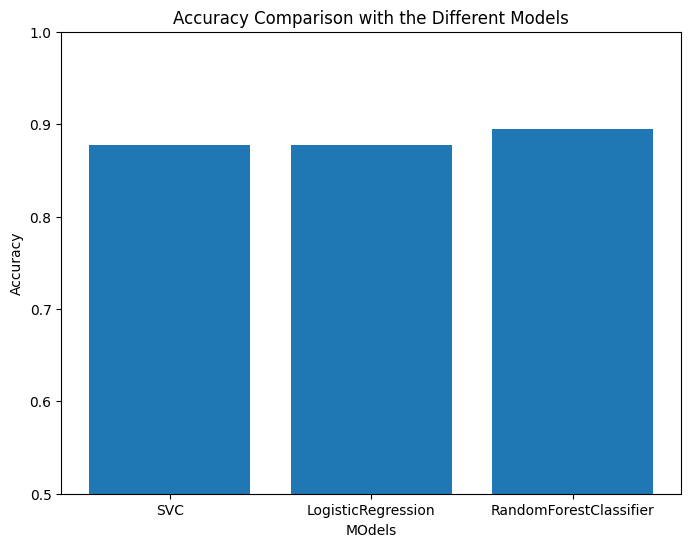

In [30]:
accurs = []
mdls = [svm_mdl,log_mdl,Rf_mdl]
for model in mdls:
    model.fit(X_train,y_train)
    y_prd = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_prd)
    accurs.append(accuracy)
    print(f'{model.__class__.__name__} accuracy:{accuracy:.2f}')
    
plt.figure(figsize=(8,6))
plt.bar([model.__class__.__name__ for model in mdls],accurs)
plt.xlabel("MOdels")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison with the Different Models")
plt.ylim(0.5,1)
plt.show()

From all three classification model, RandomForest Classifier gave the best accuracy of 89%

Now applying the PCA for dimensionality reductionm

In [31]:
pca = PCA(n_components= 10)
X_pca = pca.fit_transform(X_scal)

now spliting the data into testing and training for PCA

In [32]:
X_train_pca,X_test_pca, y_train_pca,y_test_pca = train_test_split(X_pca,y,test_size=0.2,random_state=42)

Now retrain the models using transformed data of PCA

SVC accuracy with PCA:0.88
LogisticRegression accuracy with PCA:0.88
RandomForestClassifier accuracy with PCA:0.85


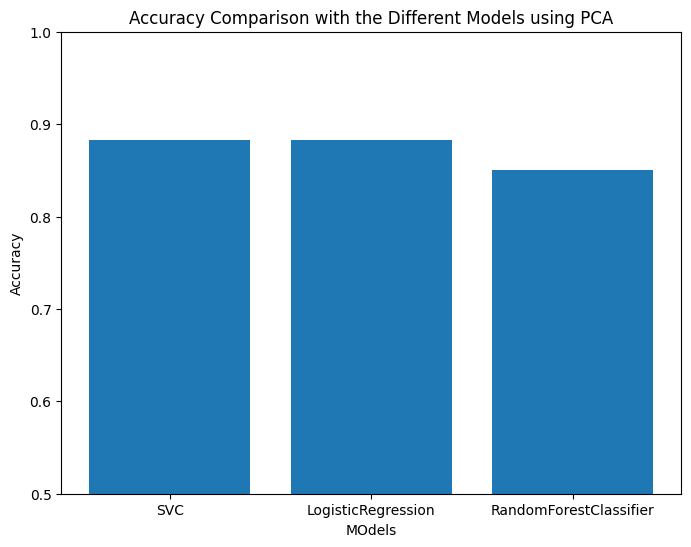

In [42]:
accuries = []
#mdls = [svm_mdl,log_mdl1,Rf_mdl1]
for model in mdls:
    model.fit(X_train_pca,y_train_pca)
    y_prd_pca = model.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test_pca,y_prd_pca)
    accuries.append(accuracy_pca)
    print(f'{model.__class__.__name__} accuracy with PCA:{accuracy_pca:.2f}')
    
plt.figure(figsize=(8,6))
plt.bar([model.__class__.__name__ for model in mdls],accuries)
plt.xlabel("MOdels")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison with the Different Models using PCA")
plt.ylim(0.5,1)
plt.show()

After using PCA for dimensionatlity reduction, RandomForest Classifiers accuracy has been
decrease as compared to other two models ie SVM and LogisticRegression.

Also, we can infer that after using PCA it has negative impact on Randomforest CLassifiers performance

But other two models SVM and Logistic Regression remain consistent even after after using PCA

Overall, at first without using PCA, RandomforestClassifier performed better but after
using PCA it experienced negative performance where other two wasnot get affected by
using PCA and remain consistent at the same accuracy.